---

#  https://github.com/matplotlib/mplfinance/issues/323

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
daily = pd.read_csv('data/SP500_NOV2019_Hist.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(2)
daily.tail(2)

(20, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878


,Open,High,Low,Close,Volume
Date,,,,,
2019-11-27,3145.49,3154.26,3143.41,3153.63,421853938
2019-11-29,3147.18,3150.30,3139.34,3140.98,286602291


In [4]:
import mplfinance as mpf
mpf.__version__

'0.12.7a8'

---

- `figscale` is used to scale the size fo the figure up or down.

- `figscale=1.0` means that the _height_ of the plot will be the default height (see below);<br>&nbsp;&nbsp;&nbsp;&nbsp; the width of the plot will depend upon the aspect ratio.

- `figratio` modifies the aspect ratio of the plot.
  - specify a tuple (width,height) for `figratio`.
  
- `figscale` and `figratio` may be used independently (they do _not_ need to be specified together)

- If not specified, the default values (as of June 2020) are:
  - `figscale = 1.0`
  - `figratio = (8.00,5.75)`

(one may also specify simply `figsize` which _overrides both_ `figscale` and `figratio`<br> specifying explicitly, at the same time, both the size and aspect ratio of the figure.)

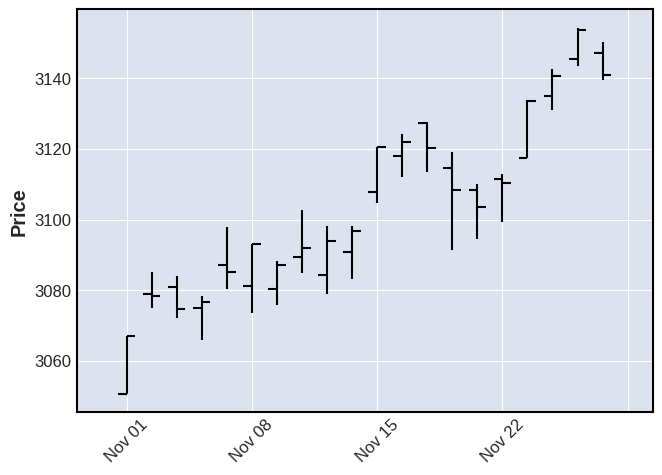

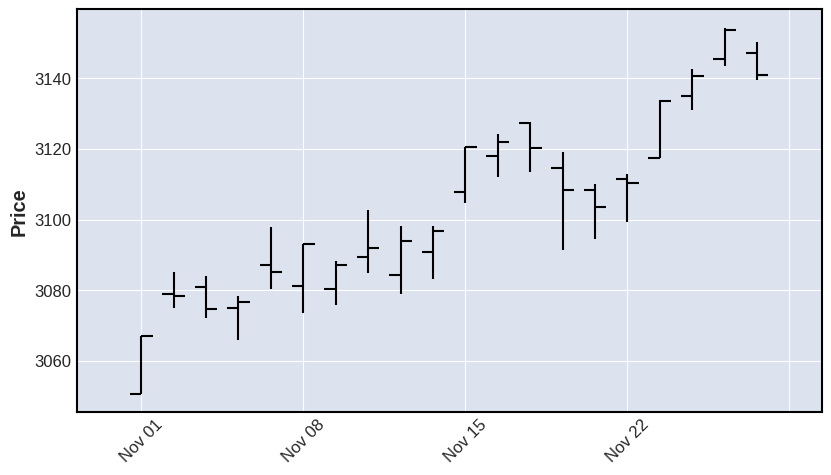

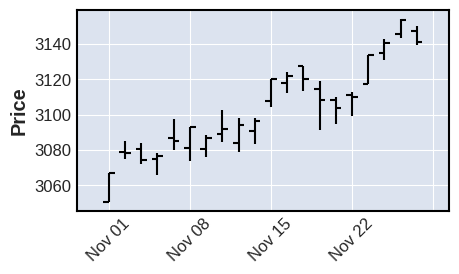

In [5]:
mpf.plot(daily)
mpf.plot(daily,figratio=(18,10))
mpf.plot(daily,figratio=(18,10),figscale=0.5)

#### Displaying non-trading periods

---

- Some users like to see gaps in the plot created by non-trading periods (days or, for intraday data, hours)
- Non-trading periods can be displayed using the **` show_nontrading `** kwarg.
- In the example below, these gaps make it easy to visualize weekend and the U.S. Thanksgiving Holiday.


In [6]:
#mpf.plot(daily,type='candle',volume=True,figscale=0.9)
#mpf.plot(daily,type='candle',volume=True,figscale=0.9,show_nontrading=True)

---

---

#### Setting the Figure Title and the Y-axis Label:

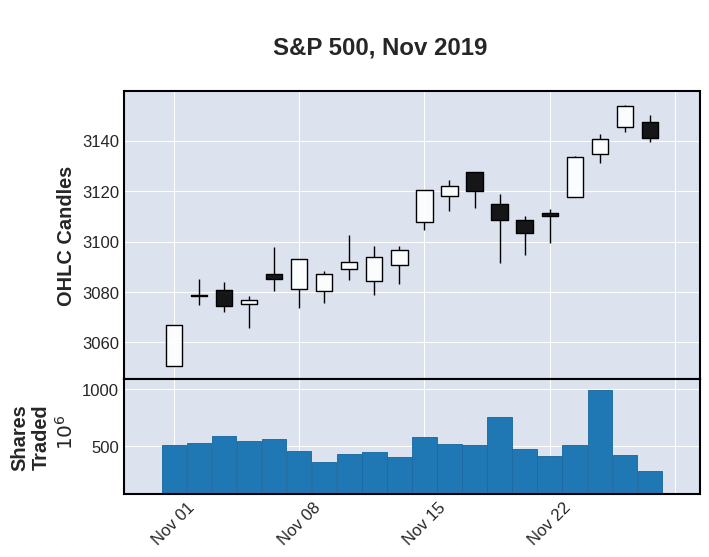

In [7]:
mpf.plot(daily,type='candle',volume=True,
         title='\nS&P 500, Nov 2019',
         ylabel='OHLC Candles',
         ylabel_lower='Shares\nTraded')

---

#### Setting the x-axis datetime format and x-axis labels rotation:

In [8]:
import matplotlib.dates as mdates

In [9]:
dt = pd.to_datetime('1/1/2021').to_pydatetime()


In [10]:
mdates.date2num(dt)
rang = range(18628,(18628+len(daily)))
             
dtmix = pd.DatetimeIndex(mdates.num2date([ix for ix in rang]))
                                          

18628.0

In [11]:
dtmix

DatetimeIndex(['2021-01-01 00:00:00+00:00', '2021-01-02 00:00:00+00:00',
               '2021-01-03 00:00:00+00:00', '2021-01-04 00:00:00+00:00',
               '2021-01-05 00:00:00+00:00', '2021-01-06 00:00:00+00:00',
               '2021-01-07 00:00:00+00:00', '2021-01-08 00:00:00+00:00',
               '2021-01-09 00:00:00+00:00', '2021-01-10 00:00:00+00:00',
               '2021-01-11 00:00:00+00:00', '2021-01-12 00:00:00+00:00',
               '2021-01-13 00:00:00+00:00', '2021-01-14 00:00:00+00:00',
               '2021-01-15 00:00:00+00:00', '2021-01-16 00:00:00+00:00',
               '2021-01-17 00:00:00+00:00', '2021-01-18 00:00:00+00:00',
               '2021-01-19 00:00:00+00:00', '2021-01-20 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [12]:
df2 = daily.copy()

In [13]:
df2.index = dtmix

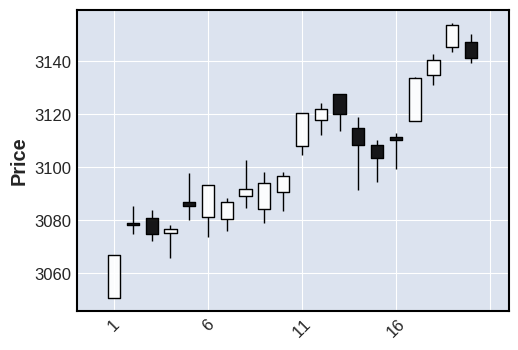

In [14]:
#mpf.plot(daily,figscale=0.65)
#mpf.plot(daily,figscale=0.65,xrotation=20)
mpf.plot(df2,type='candle',figscale=0.75,datetime_format='%-j')
#mpf.plot(daily,figscale=0.65,datetime_format=' %A, %d-%m-%Y',xrotation=90)